In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_data = pd.read_csv('CFPB-financial-wellness-data.csv')
df_data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [3]:
df_data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [4]:
# separating the target from all the features

df_data.dropna(inplace = True)
X = df_data.drop(['PRODUSE_3','PRODUSE_6', 'PUF_ID'], axis = 1)
y = df_data['PRODUSE_3']

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_data.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

<Figure size 864x720 with 0 Axes>

In [6]:
#Correlation with output variable
cor_target = abs(cor["PRODUSE_3"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

fpl              0.169273
KHscore          0.165341
PRODHAVE_1       0.153139
PRODHAVE_4       0.152083
PRODUSE_3        1.000000
PRODUSE_6        0.612998
MATHARDSHIP_1    0.171378
MATHARDSHIP_2    0.159215
PPINCIMP         0.162391
Name: PRODUSE_3, dtype: float64

# Test 1: Random Forest

In [ ]:
rf_rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rf_rfe_selector.fit(X, y) 

In [ ]:
rf_feat_columns = X.columns[rf_rfe_selector.get_support()]

In [ ]:
X_cat = df_data[rf_feat_columns].drop(columns = ["FWBscore", "KHscore", "SOCSEC3", "CONNECT", "LIFEEXPECT"], errors = "ignore").astype('str')
X_numeric = df_data[["FWBscore", "KHscore", "SOCSEC3", "CONNECT", "LIFEEXPECT"]]

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns = ["FWBscore", "KHscore", "SOCSEC3", "CONNECT", "LIFEEXPECT"])

features = pd.concat([pd.get_dummies(X_cat), X_num_scaled], axis = 1)
target = df_data['PRODUSE_3']
features

<AxesSubplot:>

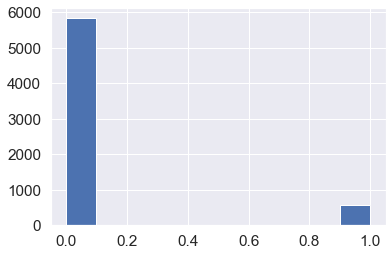

In [272]:
target.hist()

In [273]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [274]:
# Best Params - RandomForestClassifier 
RF = RandomForestClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = RF, param_grid = search_grid, scoring = 'f1')


search.fit(X_train, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.0


In [275]:
model = RandomForestClassifier(random_state=0, n_estimators=100)
results = model.fit(X_train,y_train)

y_pred_proba = results.predict_proba(X_test)[:,1]
y_pred = [ 0 if x < 0.15 else 1 for x in y_pred_proba]

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1168
           1       0.19      0.23      0.20       111

    accuracy                           0.85      1279
   macro avg       0.56      0.57      0.56      1279
weighted avg       0.86      0.85      0.85      1279



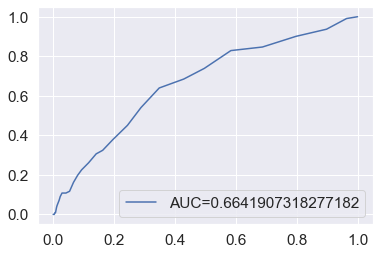

In [276]:
y_pred_proba = results.predict_proba(X_test)[:,1]
fpr, tpr, t = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

[[1059  109]
 [  86   25]]


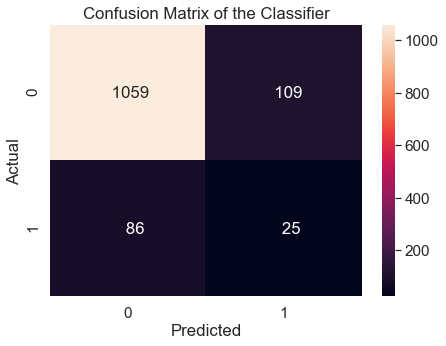

In [277]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'], index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(cf_df, annot=True, fmt='5.0f')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Test 2: Logistic Regression


## RFE

In [278]:
# Selecting the Best important features according to Logistic Regression

lr_rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 20, step = 1)
lr_rfe_selector.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [292]:
lr_feat_columns = X.columns[lr_rfe_selector.get_support()]
X_cat = df_data[lr_feat_columns].astype('str')

features = pd.get_dummies(X_cat)
target = df_data['PRODUSE_3']
features

,FINGOALS_-1,FINGOALS_0,FINGOALS_1,KH1correct_0,KH1correct_1,KH3correct_0,KH3correct_1,HOUSING_-1,HOUSING_1,HOUSING_2,...,INTERCONNECTIONS_6_0,INTERCONNECTIONS_6_1,INTERCONNECTIONS_10_0,INTERCONNECTIONS_10_1,EMPLOY1_5_0,EMPLOY1_5_1,EMPLOY1_6_0,EMPLOY1_6_1,PPT1317_0,PPT1317_1
0,0,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
4,0,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,1,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
6390,0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
6391,0,0,1,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
6392,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0


In [286]:
target = df_data['PRODUSE_3']
target

0       0
1       0
2       1
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    1
Name: PRODUSE_3, Length: 6394, dtype: int64

In [287]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [295]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.5725 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

         Current function value: 0.679460
         Iterations: 35

Model               Logistic Regression 
ROC AUC Score                   0.668757
Precision Score                 0.236842
Recall Score                    0.486486
Accuracy Score                   0.81939
F1 Score                        0.318584
dtype: object

[[994 174]
 [ 57  54]]
                Predicted group 0  Predicted group 1
Actual group 0                994                174
Actual group 1                 57                 54
 
 
              precision    recall  f1-score   support

           0      0.946     0.851     0.896      1168
           1      0.237     0.486     0.319       111

    accuracy                          0.819      1279
   macro avg      0.591     0.669     0.607      1279
weighted avg      0.884     0.819     0.846      1279

 
 
Accuracy score is
81.94 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[994 174]
 [ 57  54]]


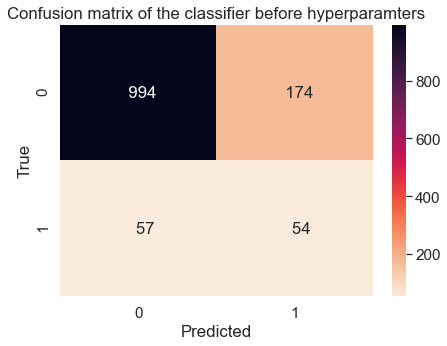

In [296]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

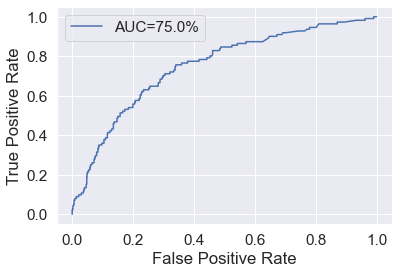

In [297]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### KBest

In [302]:
selector = SelectKBest(f_classif, k = 20)

X_0 = selector.fit_transform(X, y)

X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
#X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

test2_features = X.columns[selector.get_support()]

In [303]:
X_cat = df_data[test2_features].drop(columns = ["FWBscore", "KHscore", "LMscore", "CONNECT"], errors = "ignore").astype('str')
X_numeric = df_data[["FWBscore", "KHscore", "LMscore", "CONNECT"]]

features = pd.concat([pd.get_dummies(X_cat), X_numeric], axis = 1)
target = df_data['PRODUSE_3']
features

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [304]:
# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.55 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

         Current function value: 0.679226
         Iterations: 35

Model               Logistic Regression 
ROC AUC Score                   0.643296
Precision Score                 0.183946
Recall Score                    0.495495
Accuracy Score                  0.765442
F1 Score                        0.268293
dtype: object

[[924 244]
 [ 56  55]]
                Predicted group 0  Predicted group 1
Actual group 0                924                244
Actual group 1                 56                 55
 
 
              precision    recall  f1-score   support

           0      0.943     0.791     0.860      1168
           1      0.184     0.495     0.268       111

    accuracy                          0.765      1279
   macro avg      0.563     0.643     0.564      1279
weighted avg      0.877     0.765     0.809      1279

 
 
Accuracy score is
76.54 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[924 244]
 [ 56  55]]


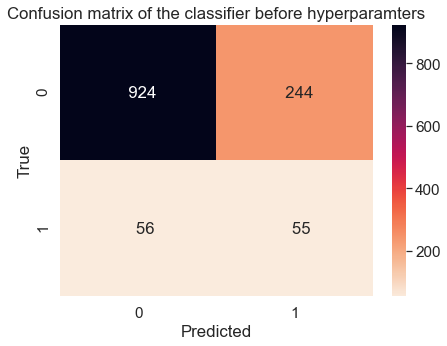

In [305]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

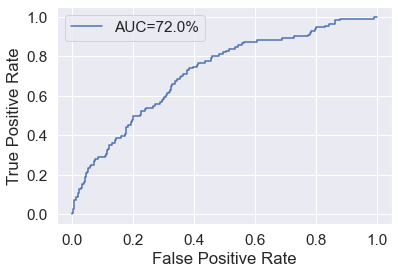

In [306]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Test 3 AdaBoost


In [315]:
ada_rfe_selector = RFE(estimator=AdaBoostClassifier(),n_features_to_select = 20, step = 1)
ada_rfe_selector.fit(X, y)
ada_features = X.columns[ada_rfe_selector.get_support()]

In [316]:
ada_features

Index(['ACT1_1', 'FINGOALS', 'FRUGALITY', 'SUBNUMERACY1', 'KHKNOWL1',
       'KHKNOWL3', 'HOUSING', 'VALUERANGES', 'MORTGAGE', 'PRODHAVE_4',
       'MATHARDSHIP_1', 'MATERIALISM_2', 'CONNECT', 'DISCOUNT',
       'INTERCONNECTIONS_4', 'SOCSEC3', 'LIFEEXPECT', 'PPETHM', 'PPREG9',
       'finalwt'],
      dtype='object')

In [317]:
X_cat = X[ada_features].drop(columns = ["FWBscore", "SOCSEC3", "LIFEEXPECT", "CONNECT"], errors = "ignore").astype('str')
X_numeric = df_data[["FWBscore", "SOCSEC3", "LIFEEXPECT", "CONNECT"]]

features = pd.concat([pd.get_dummies(X_cat), X_numeric], axis = 1)
target = df_data['PRODUSE_3']
features

,ACT1_1_-1,ACT1_1_1,ACT1_1_2,ACT1_1_3,ACT1_1_4,ACT1_1_5,FINGOALS_-1,FINGOALS_0,FINGOALS_1,FRUGALITY_-1,...,finalwt_5.184775945859379,finalwt_5.30400808744665,finalwt_5.31120828519242,finalwt_5.8530661195676394,finalwt_5.8697873155162,finalwt_6.6386741460581895,FWBscore,SOCSEC3,LIFEEXPECT,CONNECT
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,55,-2,-2,80
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,51,66,90,95
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,49,68,78,50
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,49,-1,-1,-1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,49,65,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,61,-2,100,50
6390,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,59,-2,100,100
6391,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,59,71,100,50
6392,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,46,68,20,89


In [318]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [319]:

# Best Params - AdaBoostClassifier 
ada= AdaBoostClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = ada, param_grid = search_grid, scoring = 'f1')

search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.06435588641196119


In [321]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
model.fit(X_train_scaled, y_train)

y_test_prob = results.predict(X_test_scaled)
print(y_test_prob)

y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
y_test_pred = [(x > .494) for x in y_test_ppred]

print(classification_report(y_test, y_test_pred))

from sklearn.metrics import roc_auc_score, roc_curve

fp, tp, t = roc_curve(y_test, y_test_ppred)
auc = roc_auc_score(y_test, y_test_ppred)
plt.plot(fp, tp, label = "AUC = " + str(auc))
plt.title("ROC Curve - AdaBoost")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

ValueError: shapes (1279,3204) and (66,) not aligned: 3204 (dim 1) != 66 (dim 0)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
ada_rfe_selector.get_support()

# Testing Metrics w/ Varying Number of Features and Thresholds

## Random Forest

### Number of Features

In [228]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=RandomForestClassifier(),n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < .15 else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('--------------------------')
    print(classification_report(y_test, y_pred))

Number of Features = 5
--------------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1168
           1       0.12      0.33      0.18       111

    accuracy                           0.73      1279
   macro avg       0.52      0.55      0.51      1279
weighted avg       0.85      0.73      0.78      1279

Number of Features = 10
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1168
           1       0.15      0.45      0.23       111

    accuracy                           0.73      1279
   macro avg       0.54      0.61      0.53      1279
weighted avg       0.87      0.73      0.79      1279

Number of Features = 15
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      1168
           1       0.16      0.47      0.24       111

    accuracy                  

### Threshold

In [231]:
for i in [.135, .14, .145, .15, .155]:

    features = df_data[X.columns[rfe_selector.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < i else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

AttributeError: 'RFE' object has no attribute 'support_'

## Logistic Regression (RFE)

### Number of Features

In [235]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.684496
         Iterations 4
threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1168
           1       0.15      0.64      0.25       111

    accuracy                           0.66      1279
   macro avg       0.55      0.65      0.51      1279
weighted avg       0.88      0.66      0.73      1279

Optimization terminated successfully.
         Current function value: 0.681672
         Iterations 4
threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.96      0.57      0.71      1168
           1       0.15      0.77      0.24       111

    accuracy                           0.58      1279
   macro avg       0.55      0.67      0.48      1279
weighted avg       0.89      0.58      0.67      1279

Optimization terminated successfully.
         Current function value: 0.68

### Threshold

In [236]:
for i in [.57, .5725, .575, .5775]:
 
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.679827
         Iterations 4

threshold = 0.57
------------------
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1168
           1       0.23      0.49      0.31       111

    accuracy                           0.81      1279
   macro avg       0.59      0.67      0.60      1279
weighted avg       0.88      0.81      0.84      1279

Optimization terminated successfully.
         Current function value: 0.679827
         Iterations 4

threshold = 0.5725
------------------
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1168
           1       0.23      0.48      0.31       111

    accuracy                           0.82      1279
   macro avg       0.59      0.66      0.60      1279
weighted avg       0.88      0.82      0.84      1279

Optimization terminated successfully.
         Current function va

## Logistic Regression (KBest)

### Number of Features

In [237]:
for i in range(5,21,5):
    selector = SelectKBest(f_classif, k = i)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.684510
         Iterations 4

threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1168
           1       0.14      0.63      0.23       111

    accuracy                           0.64      1279
   macro avg       0.54      0.63      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.682236
         Iterations 4

threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1168
           1       0.14      0.65      0.24       111

    accuracy                           0.64      1279
   macro avg       0.55      0.64      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.

### Threshold

In [238]:
for i in [.53, .54, .55, .56, .57]:
    selector = SelectKBest(f_classif, k = 20)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.53
------------------
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1168
           1       0.18      0.58      0.27       111

    accuracy                           0.73      1279
   macro avg       0.56      0.66      0.56      1279
weighted avg       0.88      0.73      0.79      1279

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.54
------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1168
           1       0.19      0.55      0.28       111

    accuracy                           0.75      1279
   macro avg       0.57      0.66      0.57      1279
weighted avg       0.88      0.75      0.80      1279

Optimization terminated successfully.
         Current function valu

## LDA

### Number of Features

In [239]:
for i in range(5,21,5):
    rfe_test = RFE(estimator=AdaBoostClassifier(),n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    y_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    results = model.fit(y_train, X_train_scaled)
    #print(results.summary())

    # Predict outcomes
    y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > .494) for x in y_test_ppred]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('-----------------------------')
    print(classification_report(y_test, y_test_pred))

#ValueError: X has 5 features, but DecisionTreeClassifier is expecting 20 features as input.

   

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 0 ... 1 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Threshold

In [240]:
for i in [.49, .492, .494, .496]:

    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)
    #print(results.summary())

    # Predict outcomes
    y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > i) for x in y_test_ppred]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_test_pred))


   

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 5 

In [241]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5,21,5):
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i)
    rfe_test.fit(X, y)

KeyboardInterrupt: 